## `Linear Regression`

In [2]:
# Let's generate some linear-looking data to test this equation on

import numpy as np

rng =np.random.default_rng(seed=42)
m =200
X =2 * rng.random((m ,1)) # column vector
y =4 + 3 * X + rng.standard_normal((m, 1)) # column vector

In [3]:
from sklearn.preprocessing import add_dummy_feature

X_b = add_dummy_feature(X)  #add x0 =1 to each instance
theta_best =np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y


In [4]:
# The function that we used to generate the data is y = 4 + 3X1 + Gaussian noise. Let's see what the equation found:

theta_best

array([[3.69084138],
       [3.32960458]])

In [5]:
# Now we can make predictions using θ:

X_new = np.array([[0], [2]])
X_new_b =add_dummy_feature(X_new)
y_predict =X_new_b @ theta_best

y_predict

array([[ 3.69084138],
       [10.35005055]])

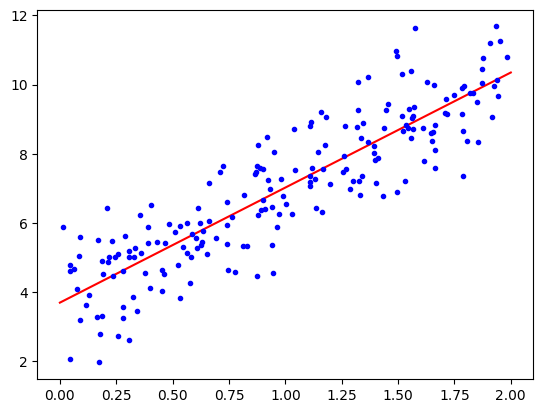

In [6]:
# Le'ts plot this model's predictions 

import matplotlib.pyplot as plt

plt.plot(X_new, y_predict, "r-", label="Predictions")
plt.plot(X, y, "b.")
[...]
plt.show()

In [7]:
# Performing linear regression using Scikit-Learn is raltively straightforward:

from sklearn.linear_model import LinearRegression
lin_reg =LinearRegression()
lin_reg.fit(X,y)
lin_reg.intercept_, lin_reg.coef_

(array([3.69084138]), array([[3.32960458]]))

In [8]:
lin_reg.predict(X_new)

array([[ 3.69084138],
       [10.35005055]])

In [9]:
theta_best_svd, residuals, rank, s =np.linalg.lstsq(X_b, y, rcond=1e-6)
theta_best_svd

array([[3.69084138],
       [3.32960458]])

In [10]:
np.linalg.pinv(X_b) @ y

array([[3.69084138],
       [3.32960458]])

## `Gradient Descent`

In [11]:
# implemetation of this algorithem:

eta =0.1 # larning rate
n_epochs = 1000
m =len(X_b)  # number of instance


rng =np.random.default_rng(seed =42)
theta =rng.standard_normal((2,1))  #randomly initialied model parameter


for epoch in range(n_epochs):
    gradients = 2 / m * X_b.T @ (X_b @ theta - y)

In [12]:
# Thats wasn't to hard , Ech iteration over the training set is calles an epoch. Lets look at the resulting theta:

theta

array([[ 0.30471708],
       [-1.03998411]])

## ` Stochastic gradient descent`

This code implements stochastic gradient descent using a simplr learning schedule:

In [13]:
n_epochs = 50
t0, t1 = 5, 50  # learning schedule hyperparameters

def learning_schedule(t):
    return t0 / (t + t1)

    rng =np.random.default_rng(seed=42)
    theta = rng.standard_normal((2, 1))  # randmly initialized model parametrs

    for epoches in range(n_epoches):
        for iteration in range(m):
            random_index = rng.integers(m)
            x1 =X_b[random_index : random_index + 1]
            yi =y[random_index : random_index + 1]
            gradients =2 * xi.T @ (xi @ theta - yi)
            eta = learning_schedule(epoch * m + iteration)
            theta =theta - rta * gradients

In [14]:
print(theta)

[[ 0.30471708]
 [-1.03998411]]


`Using SGDRegressor Class`

In [15]:
from sklearn.linear_model import SGDRegressor


sgd_reg =SGDRegressor(max_iter=1000, tol=1e-5, penalty=None, eta0=0.01, n_iter_no_change=100, random_state=42)

sgd_reg.fit(X, y.ravel())

,"loss loss: str, default='squared_error'The loss function to be used. The possible values are 'squared_error','huber', 'epsilon_insensitive', or 'squared_epsilon_insensitive'The 'squared_error' refers to the ordinary least squares fit.'huber' modifies 'squared_error' to focus less on getting outlierscorrect by switching from squared to linear loss past a distance ofepsilon. 'epsilon_insensitive' ignores errors less than epsilon and islinear past that; this is the loss function used in SVR.'squared_epsilon_insensitive' is the same but becomes squared loss pasta tolerance of epsilon.More details about the losses formulas can be found in the:ref:`User Guide `.",'squared_error'
,"penalty penalty: {'l2', 'l1', 'elasticnet', None}, default='l2'The penalty (aka regularization term) to be used. Defaults to 'l2'which is the standard regularizer for linear SVM models. 'l1' and'elasticnet' might bring sparsity to the model (feature selection)not achievable with 'l2'. No penalty is added when set to `None`.You can see a visualisation of the penalties in:ref:`sphx_glr_auto_examples_linear_model_plot_sgd_penalties.py`.",None
,"alpha alpha: float, default=0.0001Constant that multiplies the regularization term. The higher thevalue, the stronger the regularization. Also used to compute thelearning rate when `learning_rate` is set to 'optimal'.Values must be in the range `[0.0, inf)`.",0.0001
,"l1_ratio l1_ratio: float, default=0.15The Elastic Net mixing parameter, with 0 <= l1_ratio <= 1.l1_ratio=0 corresponds to L2 penalty, l1_ratio=1 to L1.Only used if `penalty` is 'elasticnet'.Values must be in the range `[0.0, 1.0]` or can be `None` if`penalty` is not `elasticnet`... versionchanged:: 1.7 `l1_ratio` can be `None` when `penalty` is not ""elasticnet"".",0.15
,"fit_intercept fit_intercept: bool, default=TrueWhether the intercept should be estimated or not. If False, thedata is assumed to be already centered.",True
,"max_iter max_iter: int, default=1000The maximum number of passes over the training data (aka epochs).It only impacts the behavior in the ``fit`` method, and not the:meth:`partial_fit` method.Values must be in the range `[1, inf)`... versionadded:: 0.19",1000
,"tol tol: float or None, default=1e-3The stopping criterion. If it is not None, training will stopwhen (loss > best_loss - tol) for ``n_iter_no_change`` consecutiveepochs.Convergence is checked against the training loss or thevalidation loss depending on the `early_stopping` parameter.Values must be in the range `[0.0, inf)`... versionadded:: 0.19",1e-05
,"shuffle shuffle: bool, default=TrueWhether or not the training data should be shuffled after each epoch.",True
,"verbose verbose: int, default=0The verbosity level.Values must be in the range `[0, inf)`.",0
,"epsilon epsilon: float, default=0.1Epsilon in the epsilon-insensitive loss functions; only if `loss` is'huber', 'epsilon_insensitive', or 'squared_epsilon_insensitive'.For 'huber', determines the threshold at which it becomes lessimportant to get the prediction exactly right.For epsilon-insensitive, any differences between the current predictionand the correct label are ignored if they are less than this threshold.Values must be in the range `[0.0, inf)`.",0.1
,"random_state random_state: int, RandomState instance, default=NoneUsed for shuffling the data, when ``shuffle`` is set to ``True``.Pass an int for reproducible output across multiple function calls.See :term:`Glossary `.",42


In [16]:
sgd_reg.intercept_, sgd_reg.coef_

(array([3.68899733]), array([3.33054574]))

## `Polynomial Regression`

In [17]:
rng =np.random.default_rng(seed =42)
m = 200
X = 6 * rng.random((m ,1)) - 3
y = 0.5 * X ** 2 + X + 2 + rng.standard_normal((m ,1))


In [18]:
from sklearn.preprocessing import PolynomialFeatures
poly_features =PolynomialFeatures(degree=2, include_bias=False)
X_poly =poly_features.fit_transform(X)

In [19]:
X[0]

array([1.64373629])

In [20]:
X_poly[0]

array([1.64373629, 2.701869  ])

X_poly now contains the original feature of X plus the square of this feature. Now we
can fit a LinearRegression model to this extended training data

In [21]:
lin_reg =LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([2.00540719]), array([[1.11022126, 0.50526985]]))

## `Learning Curve`

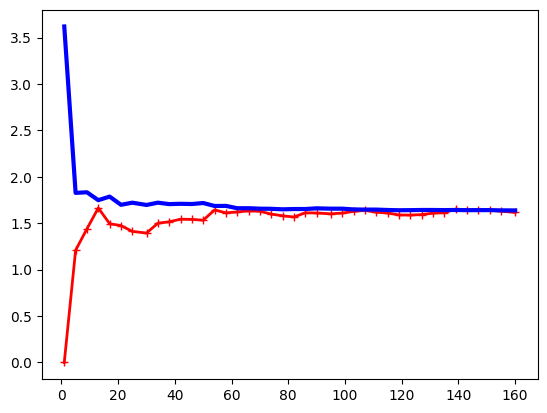

In [22]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, valid_scores =learning_curve(LinearRegression(), X, y, train_sizes=np.linspace(0.01, 1.0,  40), cv=5, scoring="neg_root_mean_squared_error")

train_errors =-train_scores.mean(axis=1)
valid_errors =-valid_scores.mean(axis=1)

plt.plot(train_sizes, train_errors, "r-+", linewidth=2, label="train")
plt.plot(train_sizes, valid_errors, "b-", linewidth=3, label="valid")
[...]
plt.show()

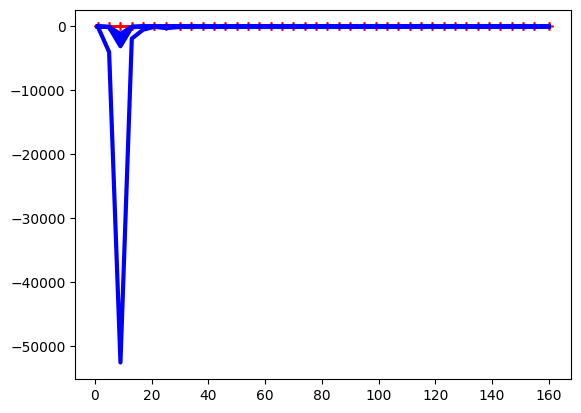

In [23]:
# Now let's look at the learning curves of a 10th-degree polynomial model on the same data


from sklearn.pipeline import make_pipeline

polynomial_regression =make_pipeline(PolynomialFeatures(degree=10, include_bias=False), LinearRegression())

train_sizes, train_scores, valid_scores =learning_curve(polynomial_regression, X, y, train_sizes=np.linspace(0.01, 1.0, 40), cv=5, scoring="neg_root_mean_squared_error")
plt.plot(train_sizes, train_scores, "r-+", linewidth=2, label="train")
plt.plot(train_sizes, valid_scores, "b-", linewidth=3, label="valid")
[...]
plt.show()

## `Ridge Regression`
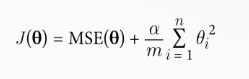

In [24]:
from sklearn.linear_model import Ridge

ridge_reg =Ridge(alpha=0.1, solver="cholesky")
ridge_reg.fit(X,y)
ridge_reg.predict([[1.5]])


array([5.06157854])

In [25]:
# And using stochastic gradient descent.

sgd_reg =SGDRegressor(penalty="l2", alpha=0.1 /m, tol=None, max_iter=1000, eta0=0.01, random_state=42)
sgd_reg.fit(X, y.ravel())  # y.ravel() because fit() expect 1D targets
sgd_reg.predict([[1.5]])

array([5.06208065])

## `Lasso Regression`
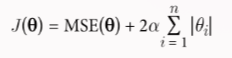

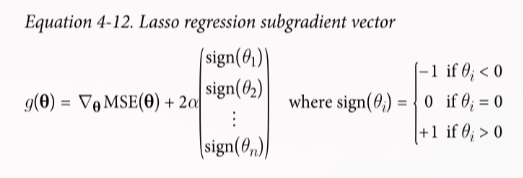

In [26]:
# is a small Scikit-learn ecample using the Lasso class:
from sklearn.linear_model import Lasso
lasso_reg =Lasso(alpha=0.1)
lasso_reg.fit(X,y)
lasso_reg.predict([[1.5]])

array([5.00803756])

## `Elastic Net Regression`

* Elastic net regression is a middle ground between ridge regression and lasso regres‐
sion. The regularization term is a weighted sum of both ridge and lasso’s regulariza‐
tion terms, and you can control the mix ratio r. When r = 0, elastic net is equivalent
to ridge regression, and when r = 1, it is equivalent to lasso regression

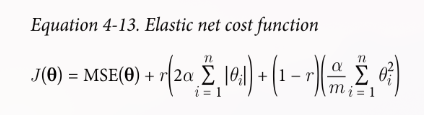

In [28]:
# Here is a short example that uses Scikit-Learn ElasticNet (l1_ratio corresponsas to the mix ration r):

from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(X,y)

elastic_net.predict([[1.5]])

array([5.006944])

## `Early Stopping`

In [30]:
# here is a basic implementation of early stopping

from copy import deepcopy
from sklearn.metrics import root_mean_squared_error
from sklearn.preprocessing import StandardScaler

X_train, y_train, X_valid, y_valid = [...]  # split the quadratic dataset

preprocessing = make_pipeline(PolynomialFeatures(degree=90, include_bias=False), StandardScaler())

X_train_prep =preprocessing.fit_transform(X_train)
X_valid_prep =preprocessing.transform(X_valid)
sgd_reg= SGDRegressor(penalty=None, eta0=0.002, random_state=42)
n_epochs = 500
best_valid_rmse = float('inf')

for epoch in range(n_epochs):
    sgd_reg.partial_fit(X_train_prep, y_train)
    y_valid_predict = sgd_reg.predict(X_valid_prep)
    val_error =root_mean_squared_error(y_valid, y_valid_predict)

    if val_error < best_valid_rmse:
        best_valid_rmse = valid_errors
        best_model = deepcopy(sgd_reg)


ValueError: not enough values to unpack (expected 4, got 1)

## `Logistic Regression`

* `Estimating Probabilities`
* Logistic regression model estimated probabilities
  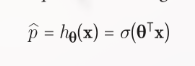

* The logistic—denoted σ(·)—is a sigmoid function (i.e., S-shaped) that outputs a num‐
ber between 0 and 1.
 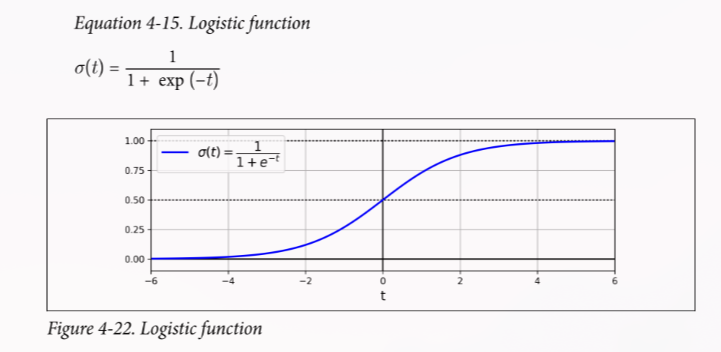

* Once the logistic regression model has estimated the probability p = hθ(x) that an
instance x belongs to the positive class, it can make its prediction ŷ easily
 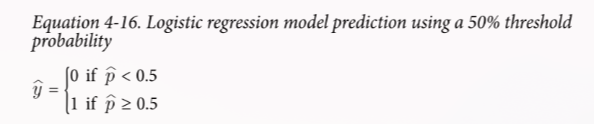

## `Decision Boundaries`
* Let’s try to build a classifier to detect the Iris virginica type based only on the petal
width feature. The first step is to load the data and take a quick peek

In [31]:
from sklearn.datasets import load_iris

iris =load_iris(as_frame=True)
list(iris)

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename',
 'data_module']

In [32]:
iris.data.head(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


In [33]:
iris.target.head(3)

0    0
1    0
2    0
Name: target, dtype: int64

In [34]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split


X = iris.data[["petal width (cm)"]].values
y = iris.target_names[iris.target]  == 'virginica'
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42)


log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, y_train)

,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",None
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",42
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:`multi

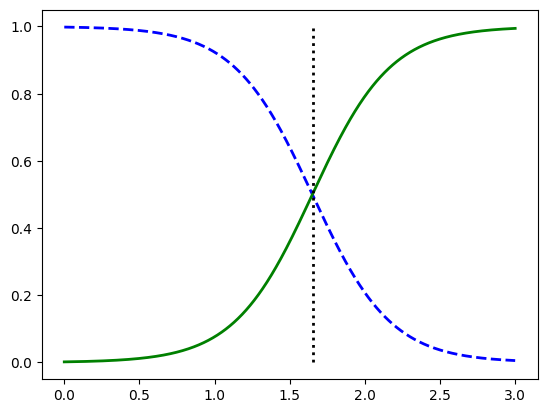

In [36]:
# Let's look at the model estimated probabilities for flowers with petal widths varying from 0 cm to  3 cm

X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)
decision_boundary = X_new[y_proba[:, 1] >= 0.5][0, 0]


plt.plot(X_new,y_proba[:, 0], "b--", linewidth=2, label="Not Iris virginica proba")
plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="Iris virginica proba")
plt.plot([decision_boundary, decision_boundary], [0,1], "k:", linewidth=2, label="Decision boundary")
[...]
plt.show()

In [37]:
decision_boundary

np.float64(1.6516516516516517)

In [38]:
log_reg.predict([[1.7], [1.5]])

array([ True, False])

Let’s use softmax regression to classify the iris plants into all three classes. Scikit-
Learn’s LogisticRegression classifier uses softmax regression automatically when
you train it on more than two classes (assuming you use solver="lbfgs", which is
the default).

In [40]:
X =iris.data[["petal length (cm)", "petal width (cm)"]].values
y = iris["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
softmax_reg = LogisticRegression(C=30, random_state=42)
softmax_reg.fit(X_train, y_train)

,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",30
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",None
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",42
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:`multic

In [41]:
softmax_reg.predict([[5,2]])

array([2])

In [42]:
softmax_reg.predict_proba([[5,2]]).round(2)

array([[0.  , 0.04, 0.96]])